<a href="https://colab.research.google.com/github/snayir6/TensorFlow/blob/main/Tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import  train_test_split
##scale the data
from sklearn.preprocessing import StandardScaler
##make same or similar the sample size
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix

In [161]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
path='/content'
num_file=os.listdir(path)
print(num_file)

['.config', 'wine-reviews.csv', 'diabetes.csv', 'heart.xlsx', 'Tensorflow_diabetes', 'Tesorflow_diabetes', 'sample_data']


In [163]:
df=pd.read_csv('wine-reviews.csv',usecols=['country','description','points','price','variety','winery'])

In [164]:
df=df.dropna(subset=['description','points'])

In [165]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


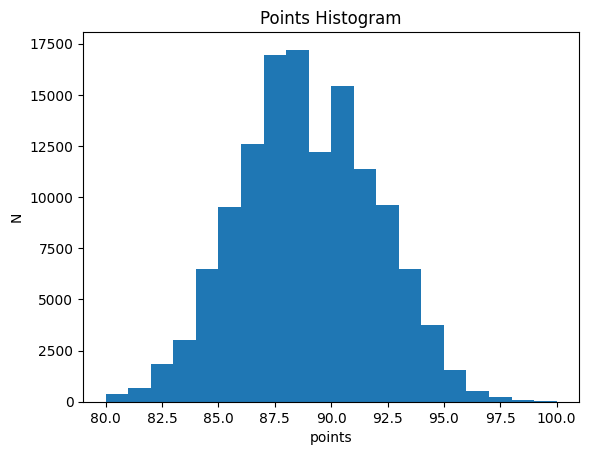

In [166]:
plt.hist(df.points, bins=20);plt.title('Points Histogram');plt.xlabel('points');plt.ylabel('N')
plt.show()

In [167]:
df=pd.read_csv('diabetes.csv')

In [168]:
df.head()
df.columns
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])
## Normalize sample size

(268, 500)

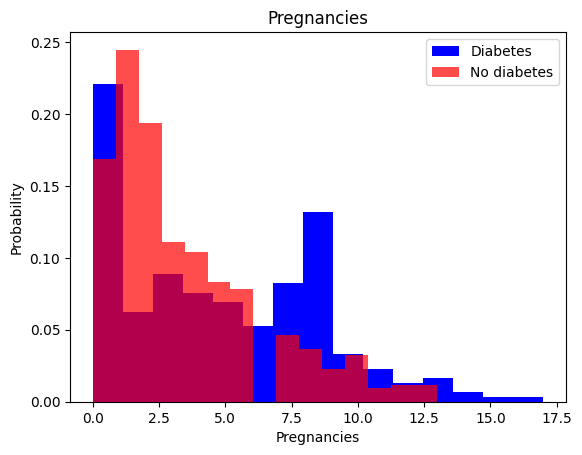

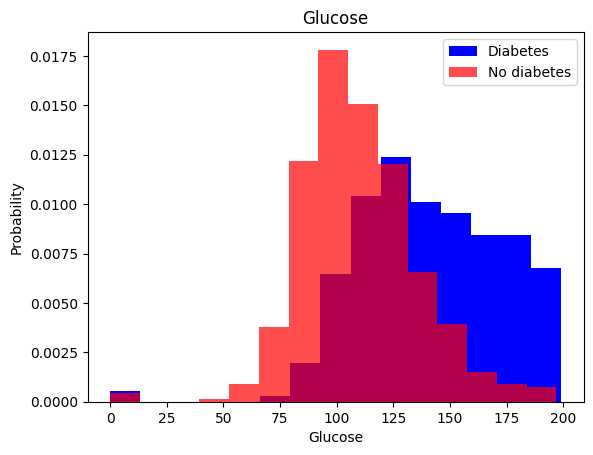

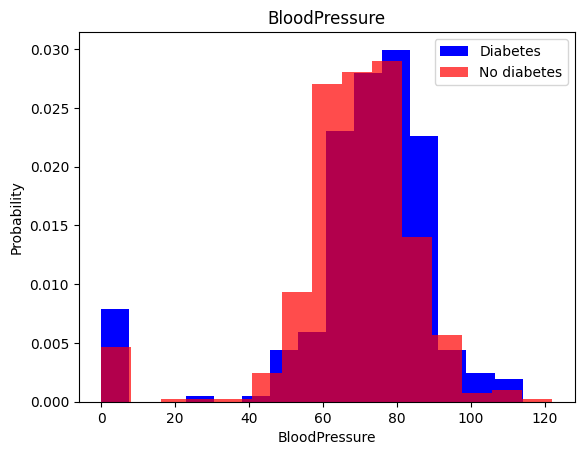

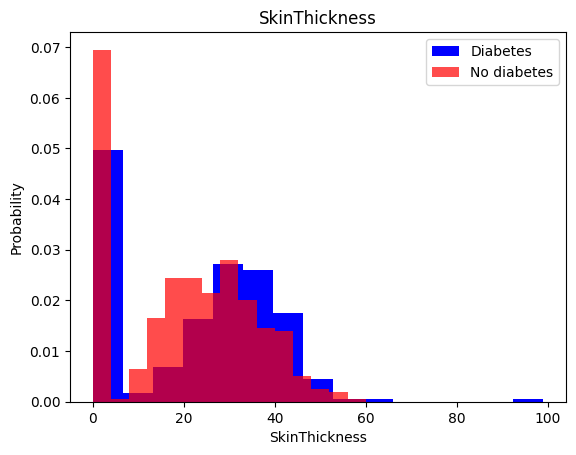

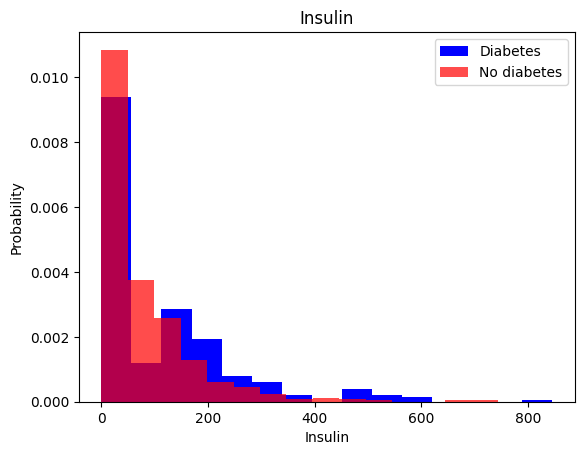

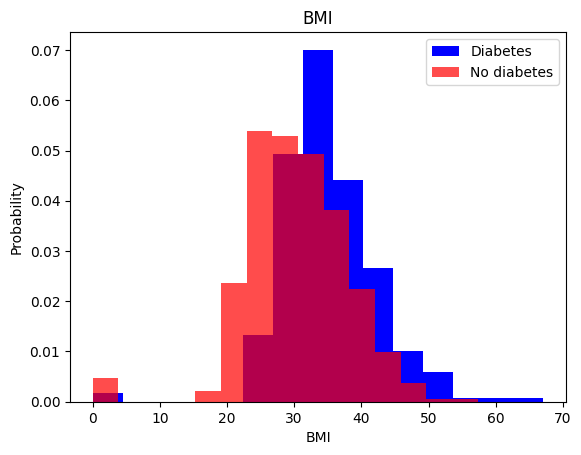

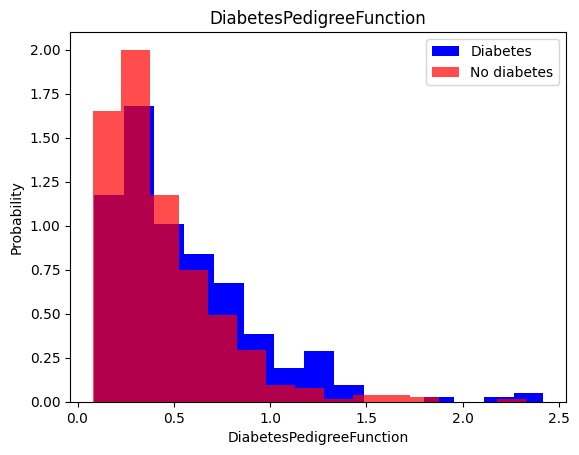

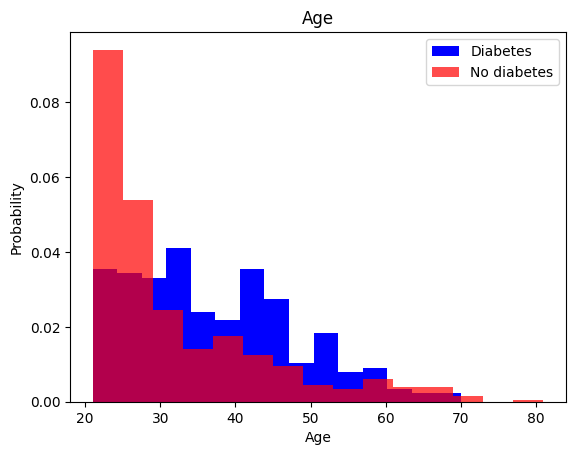

In [169]:
##Density true convert to porbabilit yof the values of different sample size
for i in range(len(df.columns[:-1])):
  label= df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',density=True, bins=15,label='Diabetes',alpha=1)
  plt.hist(df[df['Outcome']==0][label],color='red',density=True, bins=15,label='No diabetes',alpha=0.7)
  plt.title(label);plt.ylabel('Probability');plt.xlabel(label);plt.legend();plt.show()


In [170]:
## Create X and Y values and scale data to reduce the loss during training
x_old= df[df.columns[:-1]].values## Factor
y= df[df.columns[-1]].values## Response
#3Scale data using their std 
scaler=StandardScaler()
x=scaler.fit_transform(x_old)
## Normalize data set
data=np.hstack((x,np.reshape(y,(-1,1))))
df_transform=pd.DataFrame(data,columns=df.columns)
len(df_transform[df_transform['Outcome']==1]),len(df_transform[df_transform['Outcome']==0])
## make sample size same with random oversampler: Dataset balances
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
df_transform=pd.DataFrame(data,columns=df.columns)
len(df_transform[df_transform['Outcome']==1]),len(df_transform[df_transform['Outcome']==0])

(500, 500)

In [171]:
x_old= df[df.columns[:-1]].values## Factor
y= df[df.columns[-1]].values## Response
y=np.reshape(y,(-1,1))
x_old.shape, y.shape


((768, 8), (768, 1))

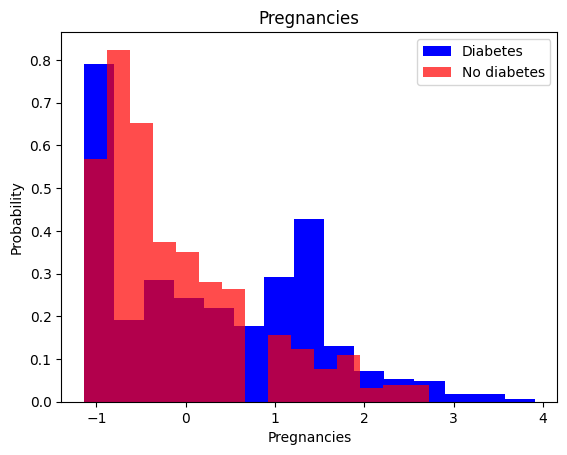

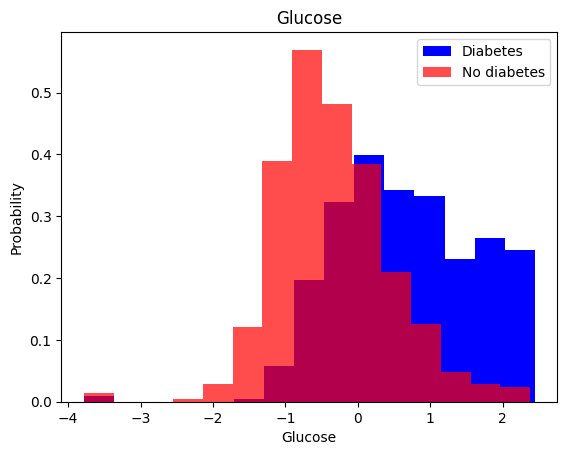

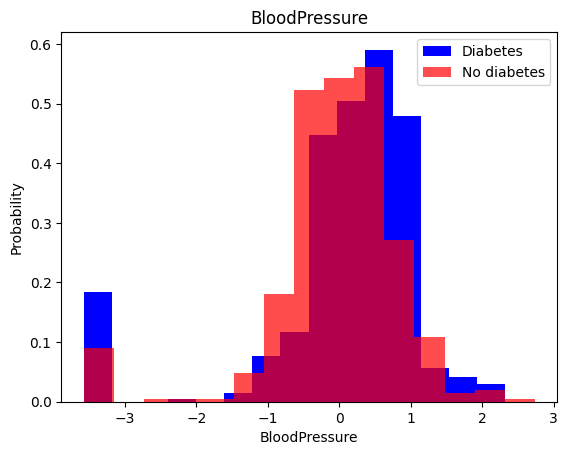

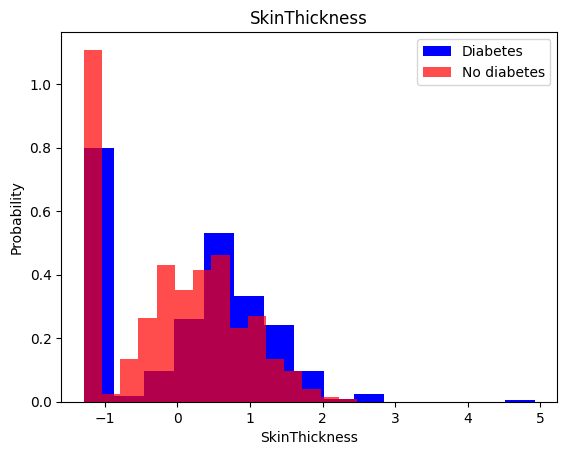

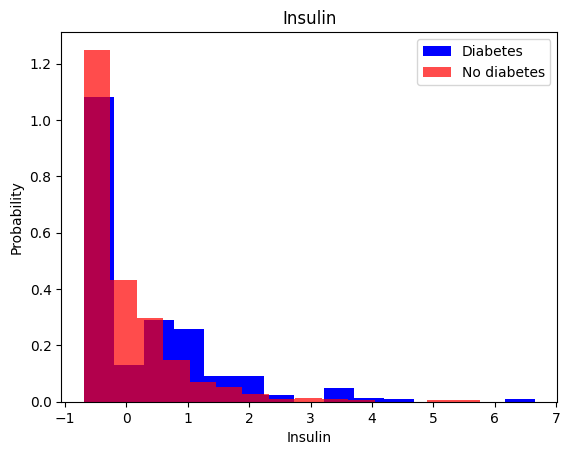

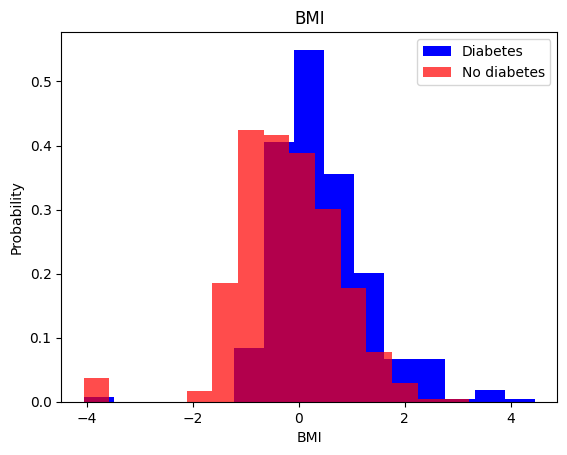

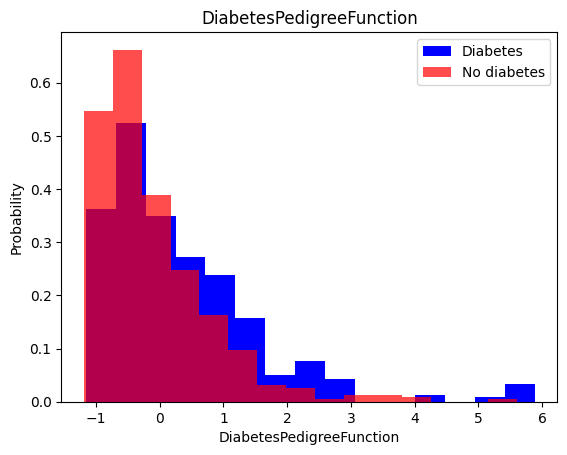

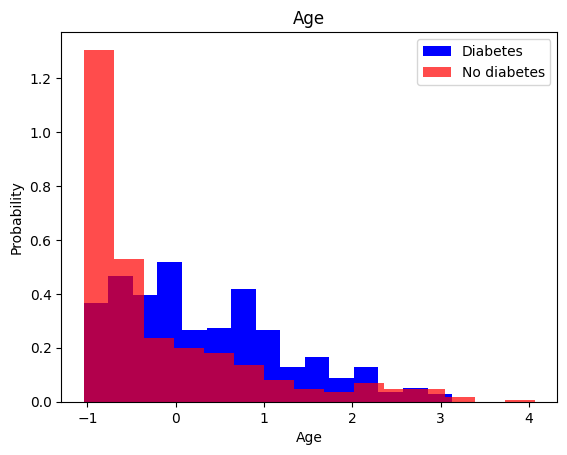

In [172]:
##Density true convert to porbabilit yof the values of different sample size
for i in range(len(df_transform.columns[:-1])):
  label= df_transform.columns[i]
  plt.hist(df_transform[df_transform['Outcome']==1][label],color='blue',density=True, bins=15,label='Diabetes',alpha=1)
  plt.hist(df_transform[df_transform['Outcome']==0][label],color='red',density=True, bins=15,label='No diabetes',alpha=0.7)
  plt.title(label);plt.ylabel('Probability');plt.xlabel(label);plt.legend();plt.show()

In [173]:
##split training set--> _train:60% of data for training _temp: %40-----> test_size=0.4 splits to train and temp
x_train,x_temp,y_train,y_temp=train_test_split(x,y, test_size=0.4, random_state=0)
##split temp firther to validation and test set (40% of data) valid: 20% test:20%-----> test_size=0.t splits to valid and test fity fity
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp, test_size=0.5, random_state=0)

ValueError: ignored

In [ ]:
## Build model stack of layers
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),# if x<0 -->0, x>0-->x
    tf.keras.layers.Dense(16, activation='relu'),# if x<0 -->0, x>0-->x
    tf.keras.layers.Dense(1, activation='sigmoid')# if x<0 -->0, x>0-->x
])

In [ ]:
##Model compile: choose optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),## set hyperparameter learning rate
              loss=tf.keras.losses.BinaryCrossentropy(),## because the classification binaer 0 1
              metrics=['accuracy']
              )

In [ ]:
##test model
model.evaluate(x_train,y_train)

In [ ]:
## train data batch size: number of sample
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid,y_valid))

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#cm= confusion_matrix(y_test, y_pred)
np.reshape(y_pred,(-1,1)), y_test.shape  